In [1]:
from google.colab import files
uploaded = files.upload()

Saving 2324 Christmas Carol Seats per Performance by Ticket Buyer.csv to 2324 Christmas Carol Seats per Performance by Ticket Buyer.csv


In [2]:
import pandas as pd
import io
df1 = pd.read_csv(io.BytesIO(uploaded['2324 Christmas Carol Seats per Performance by Ticket Buyer.csv']))
print(df1)

      Order Number Order Active Date  Customer Number Contact Last Name  \
0           642233   6/25/2022 20:15         254377.0           Despres   
1           642335   6/28/2022 15:44         111910.0            Wilder   
2           642400   6/29/2022 19:37          57471.0              Blum   
3           643077    7/9/2022 10:31         146536.0              Leto   
4           643129    7/9/2022 14:01          21366.0              Bria   
...            ...               ...              ...               ...   
2759        671132  12/22/2022 19:03         343987.0      Window Sales   
2760        671233  12/23/2022 11:11         351354.0           Nesting   
2761        671262  12/23/2022 12:49         351371.0             Welly   
2762        671351  12/23/2022 18:18         343987.0      Window Sales   
2763        671357  12/23/2022 18:41         346777.0         McWalters   

     Contact First Name   Event Code Price Type Name  \
0               Caitlyn  ACC 122222E      S

In [3]:
# Convert the "Order Active Date" to datetime format
df1['Order Active Date'] = pd.to_datetime(df1['Order Active Date'], errors='coerce')

# Replace NaN with 0 for numerical columns
numerical_columns = ['SUM Order Admission Amount', 'SUM Order Admission Net', 'SUM Order Admission Net Paid', 'COUNT Seat']
df1[numerical_columns] = df1[numerical_columns].fillna(0)

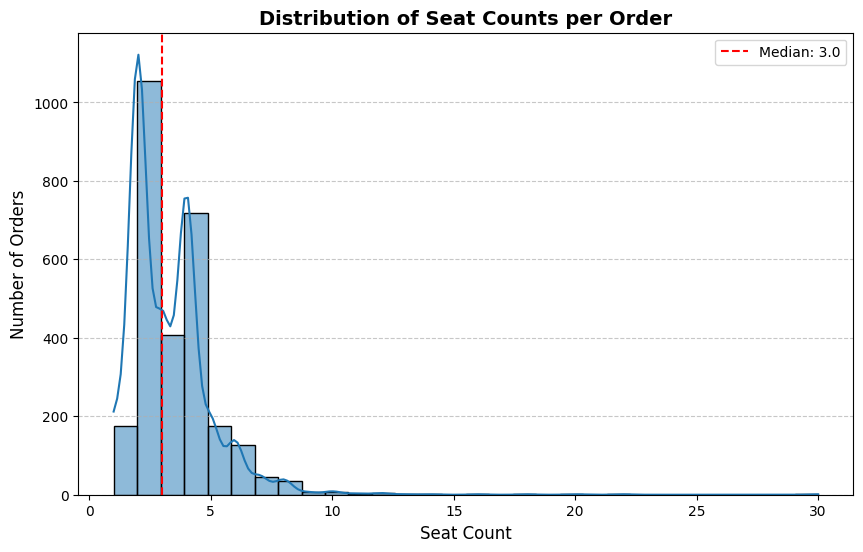

In [5]:
import matplotlib.pyplot as plt # Import the pyplot module from matplotlib
import seaborn as sns
# --- Plot 1: Distribution of Seat Counts per Order ---
plt.figure(figsize=(10, 6))

# Use seaborn for a more visually appealing histogram
sns.histplot(df1['COUNT Seat'].astype(int), bins=30, kde=True)

plt.title('Distribution of Seat Counts per Order', fontsize=14, fontweight='bold')
plt.xlabel('Seat Count', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add subtle gridlines

# Add annotations for clarity
median_seats = df1['COUNT Seat'].median()
plt.axvline(median_seats, color='red', linestyle='--', label=f'Median: {median_seats}')
plt.legend()

plt.show()

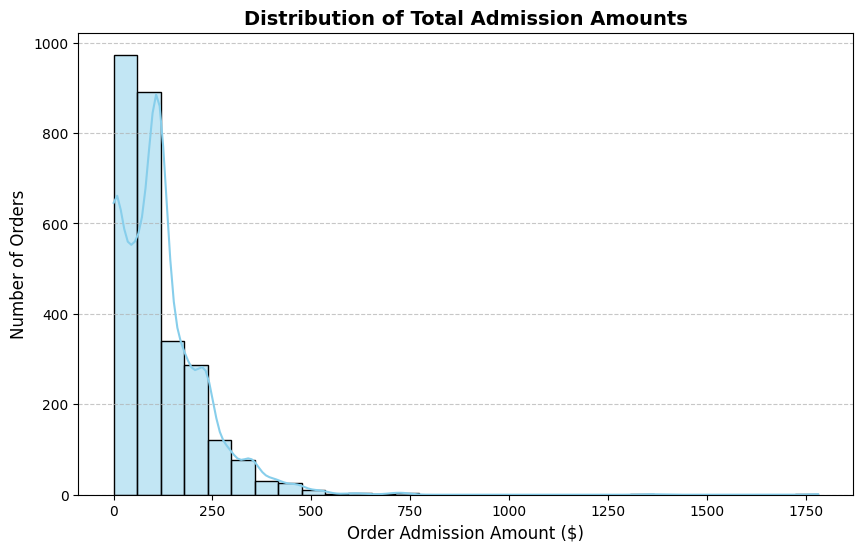

In [6]:
# --- Plot 2: Distribution of Total Admission Amounts ---
plt.figure(figsize=(10, 6))

# Use seaborn for styling and add a kernel density estimate
sns.histplot(df1['SUM Order Admission Amount'], bins=30, kde=True, color='skyblue')

plt.title('Distribution of Total Admission Amounts', fontsize=14, fontweight='bold')
plt.xlabel('Order Admission Amount ($)', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

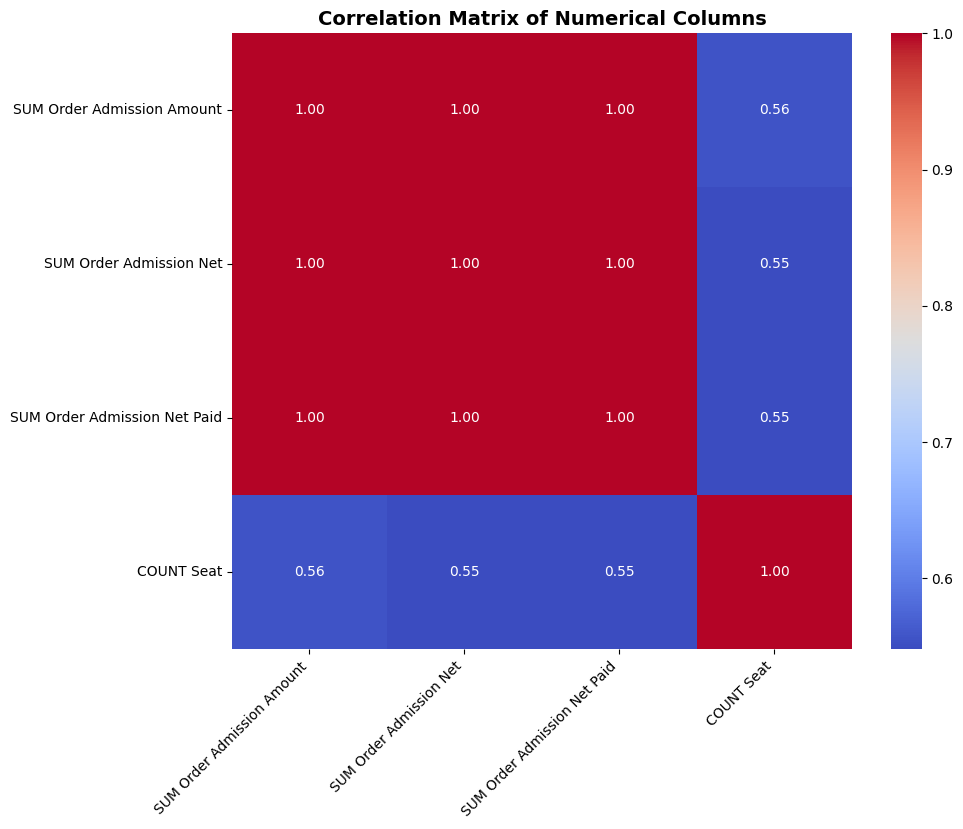

In [7]:
# --- Plot 3: Correlation Heatmap of Numerical Columns ---
plt.figure(figsize=(10, 8))

correlation_matrix = df1[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})

plt.title('Correlation Matrix of Numerical Columns', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal

plt.show()

<Figure size 1600x1000 with 0 Axes>

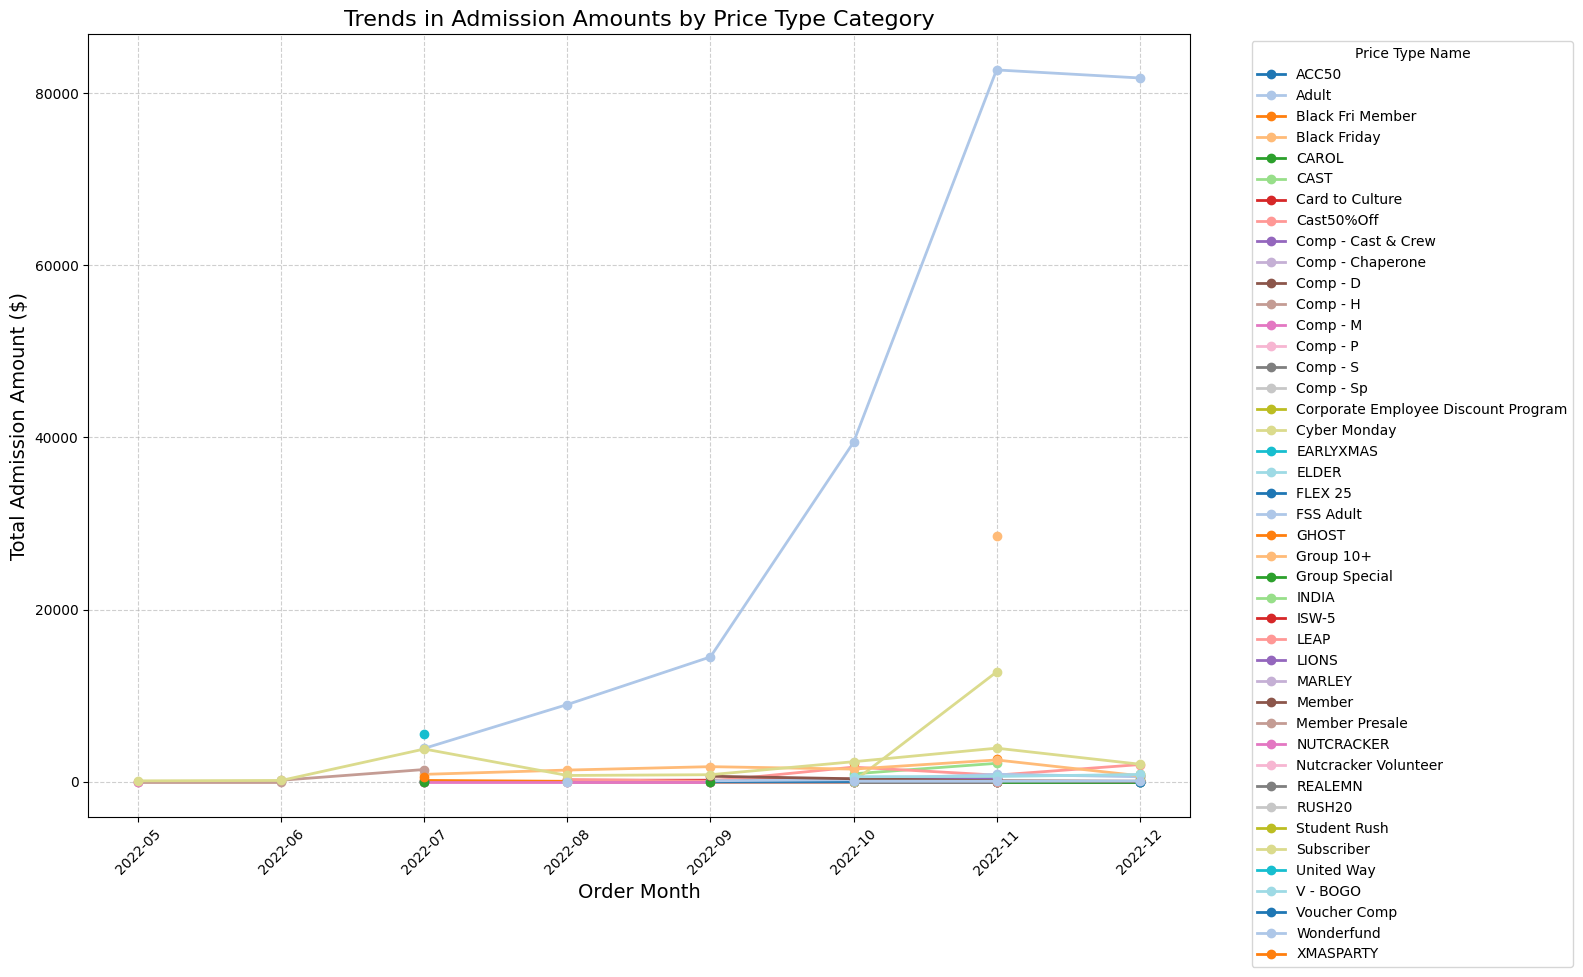

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by 'Price Type Name' and resample by month to see trends over time
df1['Order Month'] = df1['Order Active Date'].dt.to_period('M').astype(str)

# Summarize numerical values by price type and month
price_type_trends = df1.groupby(['Order Month', 'Price Type Name'])['SUM Order Admission Amount'].sum().reset_index()

# Pivot the data for visualization
pivot_data = price_type_trends.pivot(index='Order Month', columns='Price Type Name', values='SUM Order Admission Amount')

# Plot trends for each price type category
plt.figure(figsize=(16, 10))

# Use a color palette with better distinction
palette = sns.color_palette('tab20', n_colors=len(pivot_data.columns))

# Plot with improved formatting
pivot_data.plot(kind='line', marker='o', linewidth=2, figsize=(16, 10), color=palette)

# Add labels and title
plt.title('Trends in Admission Amounts by Price Type Category', fontsize=16)
plt.xlabel('Order Month', fontsize=14)
plt.ylabel('Total Admission Amount ($)', fontsize=14)

# Rotate x-ticks for readability
plt.xticks(rotation=45)

# Adjust the legend to avoid clutter
plt.legend(title='Price Type Name', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


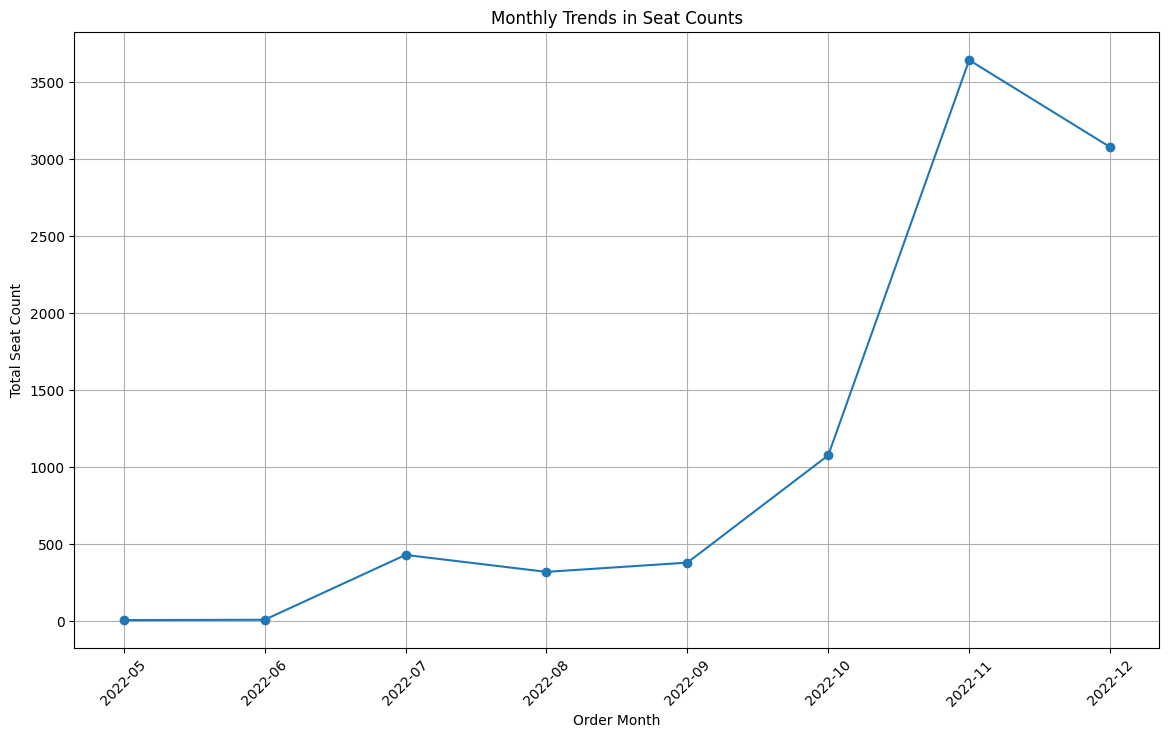

In [9]:
# Group data by month and sum the seat counts
monthly_seat_trends = df1.groupby('Order Month')['COUNT Seat'].sum().reset_index()

# Plot monthly trends in seat counts
plt.figure(figsize=(14, 8))
plt.plot(monthly_seat_trends['Order Month'], monthly_seat_trends['COUNT Seat'], marker='o')
plt.title('Monthly Trends in Seat Counts')
plt.xlabel('Order Month')
plt.ylabel('Total Seat Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


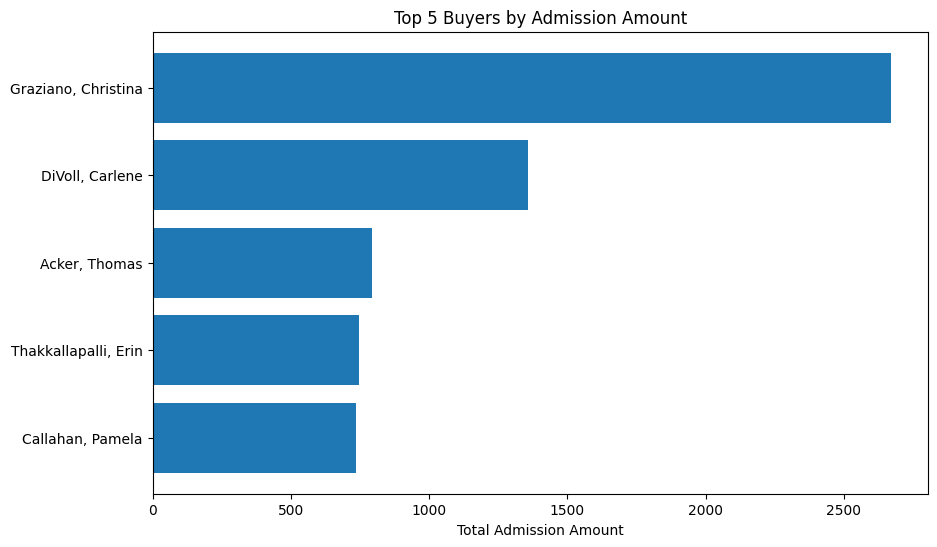

In [10]:
# Group by 'Contact Last Name' and 'Contact First Name' and sum the admission amounts
top_buyers = df1.groupby(['Contact Last Name', 'Contact First Name'])['SUM Order Admission Amount'].sum().reset_index()

# Sort the buyers by total admission amount in descending order and get the top 5
top_5_buyers = top_buyers.sort_values(by='SUM Order Admission Amount', ascending=False).head(5)

# Plot the top 5 buyers
plt.figure(figsize=(10, 6))
plt.barh(top_5_buyers['Contact Last Name'] + ', ' + top_5_buyers['Contact First Name'], top_5_buyers['SUM Order Admission Amount'])
plt.xlabel('Total Admission Amount')
plt.title('Top 5 Buyers by Admission Amount')
plt.gca().invert_yaxis()
plt.show()


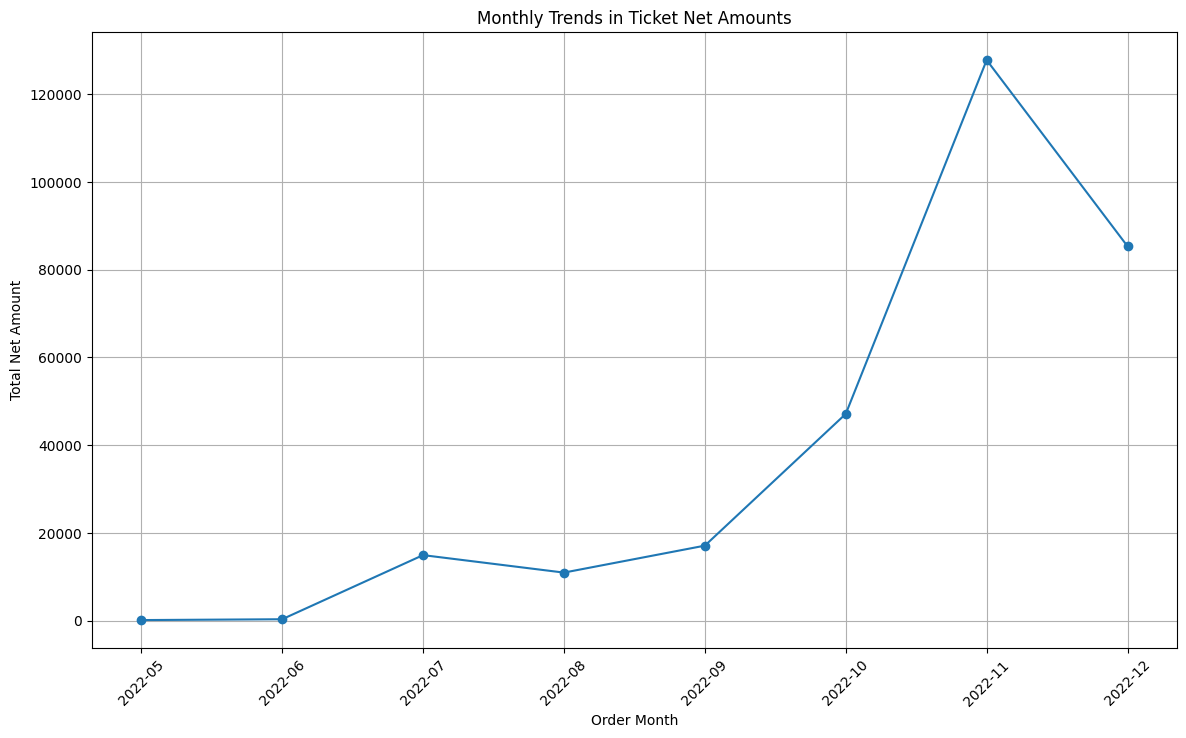

In [11]:
# Group data by month and sum the net amounts
monthly_net_trends = df1.groupby('Order Month')['SUM Order Admission Net'].sum().reset_index()

# Plot monthly trends in net amounts
plt.figure(figsize=(14, 8))
plt.plot(monthly_net_trends['Order Month'], monthly_net_trends['SUM Order Admission Net'], marker='o', linestyle='-')
plt.title('Monthly Trends in Ticket Net Amounts')
plt.xlabel('Order Month')
plt.ylabel('Total Net Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


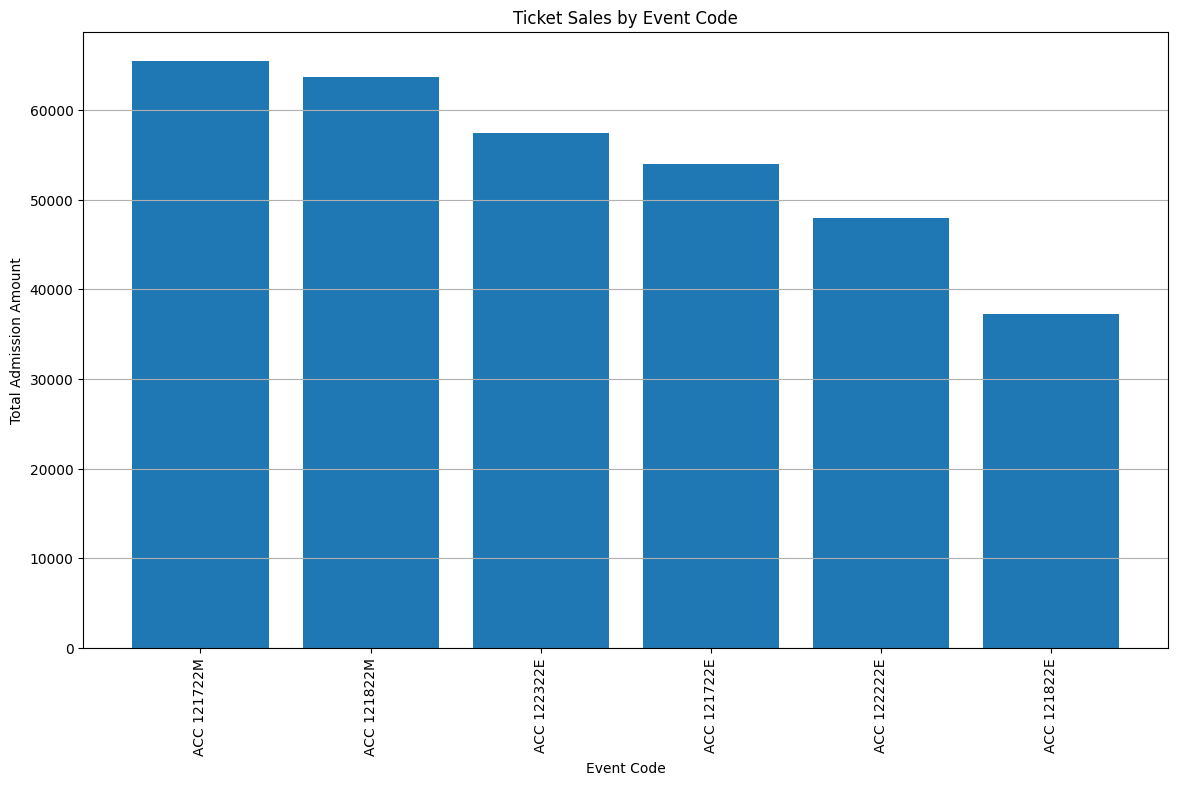

In [12]:
# Group data by 'Event Code' and sum the admission amounts
event_sales = df1.groupby('Event Code')['SUM Order Admission Amount'].sum().reset_index()

# Sort events by total admission amount in descending order
event_sales_sorted = event_sales.sort_values(by='SUM Order Admission Amount', ascending=False)

# Plot ticket sales by event code
plt.figure(figsize=(14, 8))
plt.bar(event_sales_sorted['Event Code'], event_sales_sorted['SUM Order Admission Amount'])
plt.title('Ticket Sales by Event Code')
plt.xlabel('Event Code')
plt.ylabel('Total Admission Amount')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


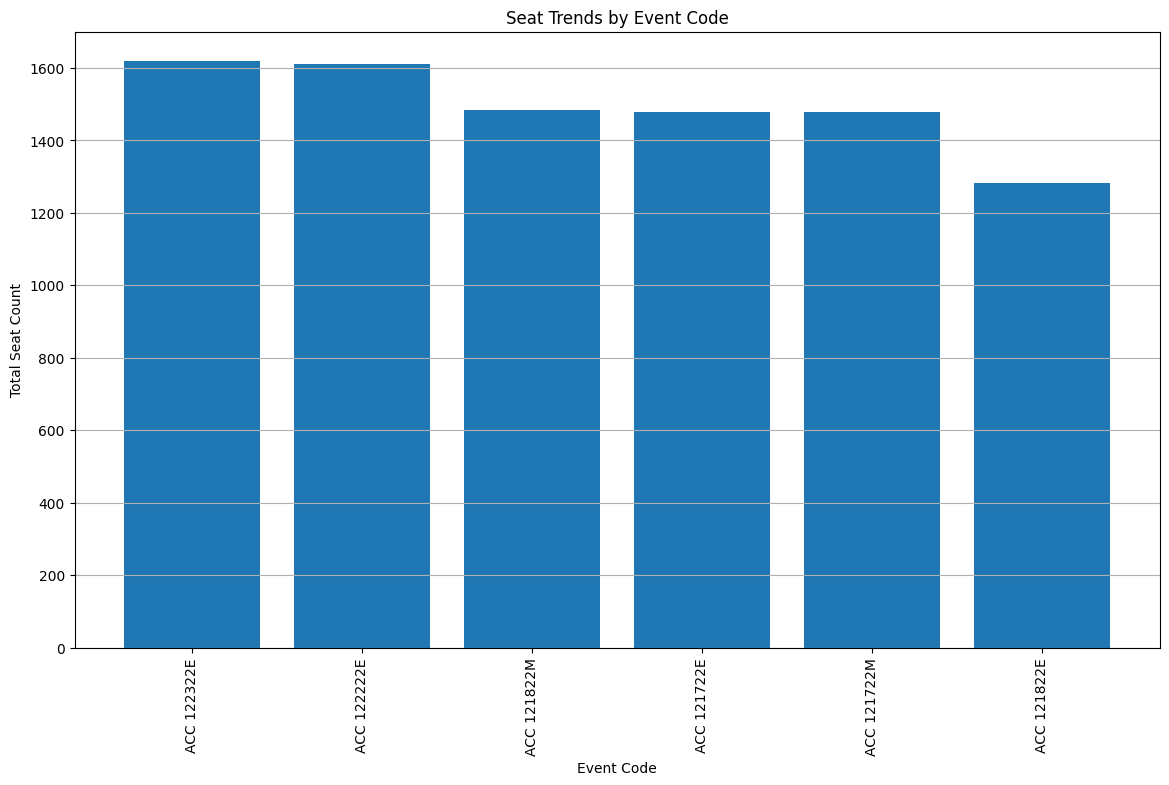

In [13]:
# Group data by 'Event Code' and sum the seat counts
seat_trends_by_event = df1.groupby('Event Code')['COUNT Seat'].sum().reset_index()

# Sort by total seat counts in descending order
seat_trends_by_event_sorted = seat_trends_by_event.sort_values(by='COUNT Seat', ascending=False)

# Plot seat trends by event code
plt.figure(figsize=(14, 8))
plt.bar(seat_trends_by_event_sorted['Event Code'], seat_trends_by_event_sorted['COUNT Seat'])
plt.title('Seat Trends by Event Code')
plt.xlabel('Event Code')
plt.ylabel('Total Seat Count')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()


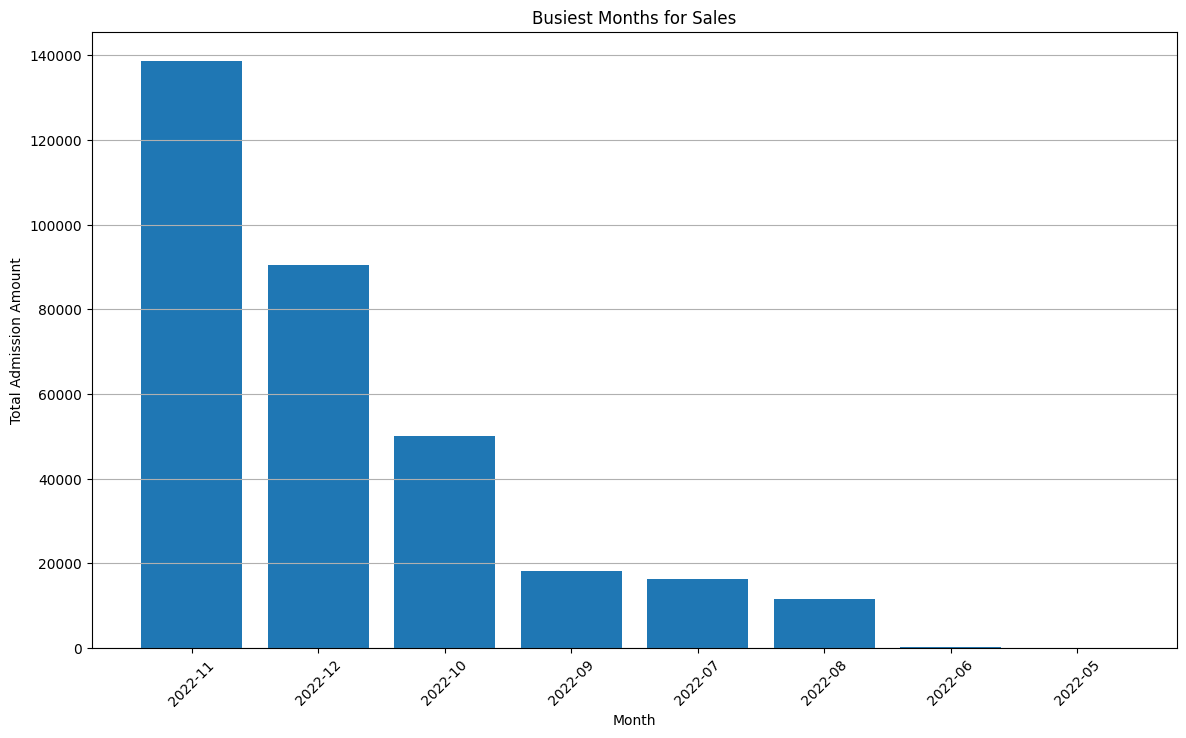

In [14]:
# Group data by month and sum the admission amounts to identify busiest months for sales
busiest_months = df1.groupby('Order Month')['SUM Order Admission Amount'].sum().reset_index()

# Sort by total admission amount in descending order to identify busiest months
busiest_months_sorted = busiest_months.sort_values(by='SUM Order Admission Amount', ascending=False)

# Plot busiest months for sales
plt.figure(figsize=(14, 8))
plt.bar(busiest_months_sorted['Order Month'], busiest_months_sorted['SUM Order Admission Amount'])
plt.title('Busiest Months for Sales')
plt.xlabel('Month')
plt.ylabel('Total Admission Amount')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


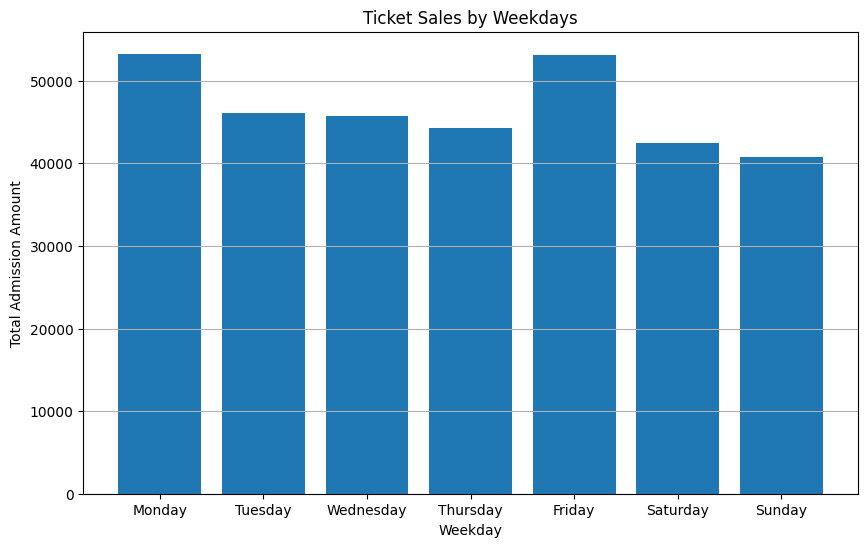

In [15]:
# Extract the day of the week from the 'Order Active Date'
df1['Order Weekday'] = df1['Order Active Date'].dt.day_name()

# Group by weekdays and sum the admission amounts
weekday_sales = df1.groupby('Order Weekday')['SUM Order Admission Amount'].sum().reset_index()

# Sort weekdays to follow the natural order (Monday to Sunday)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales['Order Weekday'] = pd.Categorical(weekday_sales['Order Weekday'], categories=weekday_order, ordered=True)
weekday_sales_sorted = weekday_sales.sort_values('Order Weekday')

# Plot ticket sales by weekdays
plt.figure(figsize=(10, 6))
plt.bar(weekday_sales_sorted['Order Weekday'], weekday_sales_sorted['SUM Order Admission Amount'])
plt.title('Ticket Sales by Weekdays')
plt.xlabel('Weekday')
plt.ylabel('Total Admission Amount')
plt.grid(axis='y')
plt.show()


In [16]:
from google.colab import files
uploaded = files.upload()

Saving 2324 Christmas Carol by Solicited by Post Card.csv to 2324 Christmas Carol by Solicited by Post Card.csv


In [17]:
import pandas as pd
import io
df2 = pd.read_csv(io.BytesIO(uploaded['2324 Christmas Carol by Solicited by Post Card.csv']))
print(df2)

    Customer Number Default First Name Default Last Name  \
0            276844                Jim         Gulinello   
1            347127            Bethany            Ingram   
2             73306              Scott            Conner   
3             88246            Colleen            Lougee   
4            170593          Stephanie         Pandiscio   
..              ...                ...               ...   
75           191799             Pamela           Perkins   
76           274087            Michael         Tachibana   
77           114011              Scott          Williams   
78             6602              Wendy     Luopa-Macleod   
79           299137            Vanessa           De Leon   

   Default Salutation Name Default Address City Default Address State  \
0            Jim Gulinello             Millbury                    MA   
1        Dr Bethany Ingram        West Boylston                    MA   
2             Scott Conner            Jefferson             

**1. Bar Chart: Ticket Sales by Performance Date**

<ipython-input-18-8f2fa80bab57>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=performance_counts.index, y=performance_counts.values, palette='viridis')


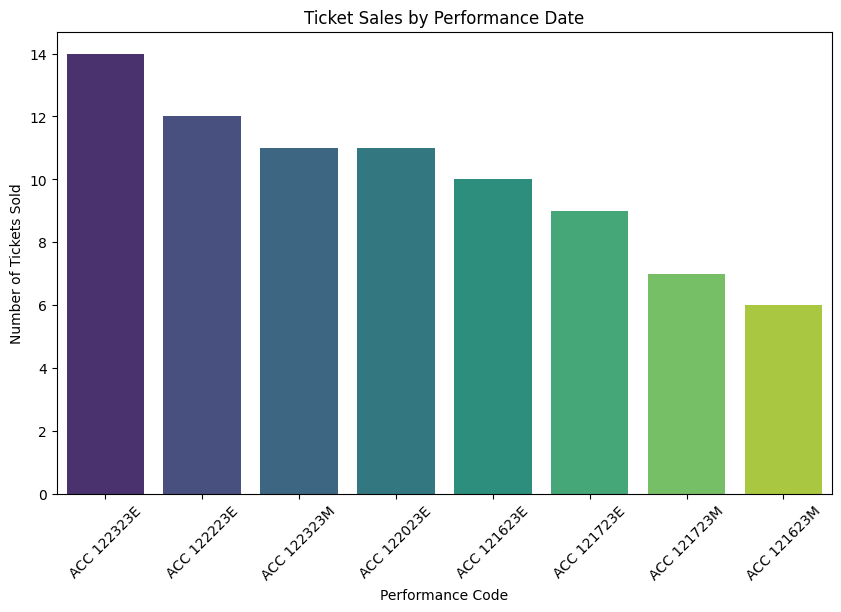

In [18]:
# Count of tickets sold per performance date
performance_counts = df2['Performance Code'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=performance_counts.index, y=performance_counts.values, palette='viridis')
plt.title("Ticket Sales by Performance Date")
plt.xlabel("Performance Code")
plt.ylabel("Number of Tickets Sold")
plt.xticks(rotation=45)
plt.show()


**2. Pie Chart: Distribution of Ticket Price Types**

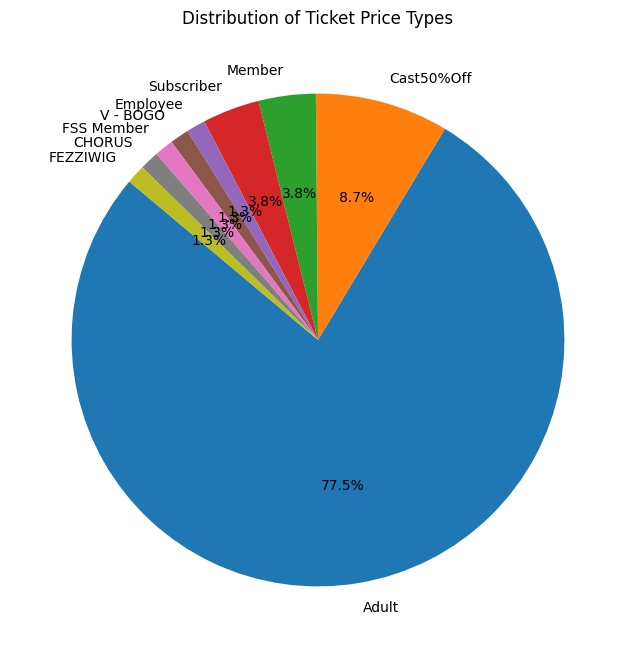

In [19]:
# Distribution of ticket price types
price_type_counts = df2['Price Type Name'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(price_type_counts, labels=price_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Ticket Price Types")
plt.show()


**3. Histogram: Ticket Purchase Amounts**

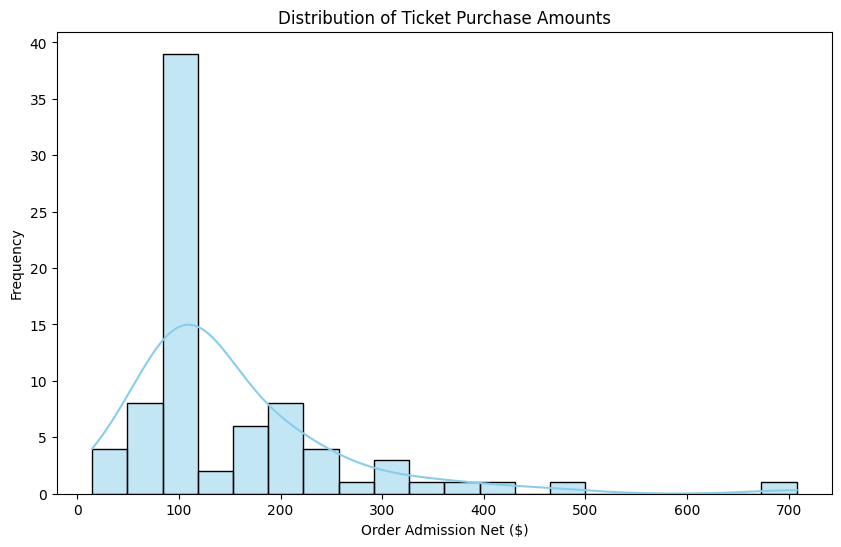

In [20]:
# Histogram of ticket admission net amounts
plt.figure(figsize=(10, 6))
sns.histplot(df2['SUM Order Admission Net'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Ticket Purchase Amounts")
plt.xlabel("Order Admission Net ($)")
plt.ylabel("Frequency")
plt.show()


**4. Scatter Plot: Number of Tickets vs. Total Purchase Amount**

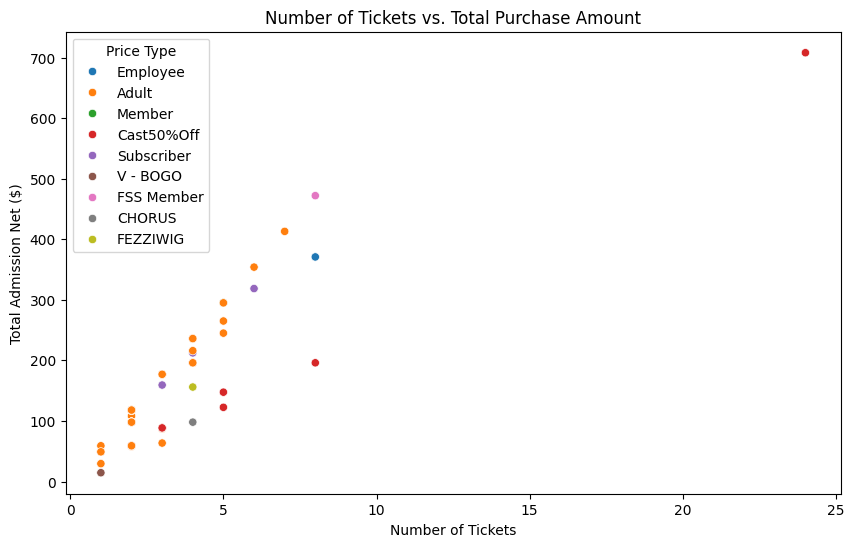

In [21]:
# Scatter plot of the number of tickets vs. total admission net amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='COUNT Order Admission ID', y='SUM Order Admission Net', data=df2, hue='Price Type Name', palette='tab10')
plt.title("Number of Tickets vs. Total Purchase Amount")
plt.xlabel("Number of Tickets")
plt.ylabel("Total Admission Net ($)")
plt.legend(title="Price Type")
plt.show()


**5. Bar Plot: Top 10 Cities by Number of Customers**

<ipython-input-22-bd9af2c622de>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.index, y=top_cities.values, palette='pastel')


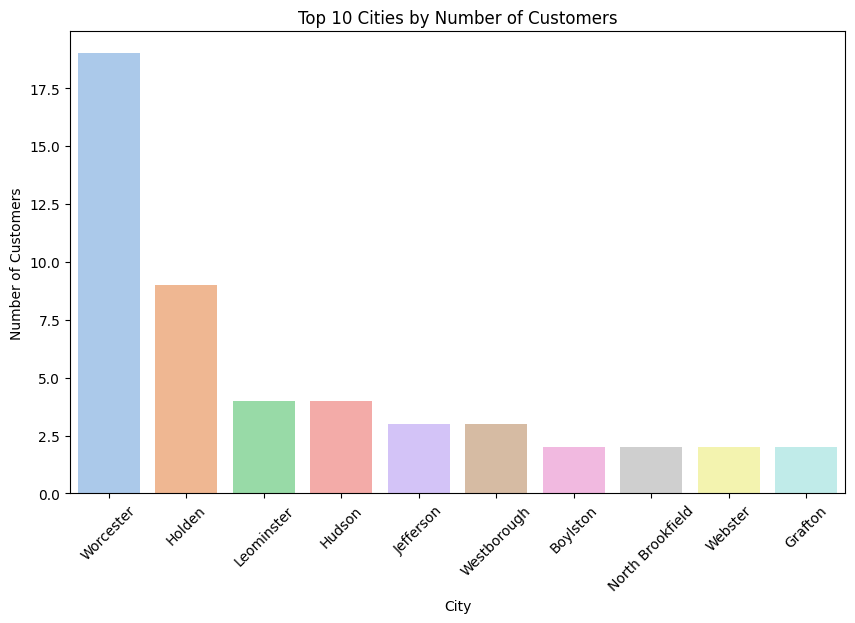

In [22]:
# Count customers by city and get the top 10
top_cities = df2['Default Address City'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='pastel')
plt.title("Top 10 Cities by Number of Customers")
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()


**6. Heatmap: Correlation Between Numeric Columns**

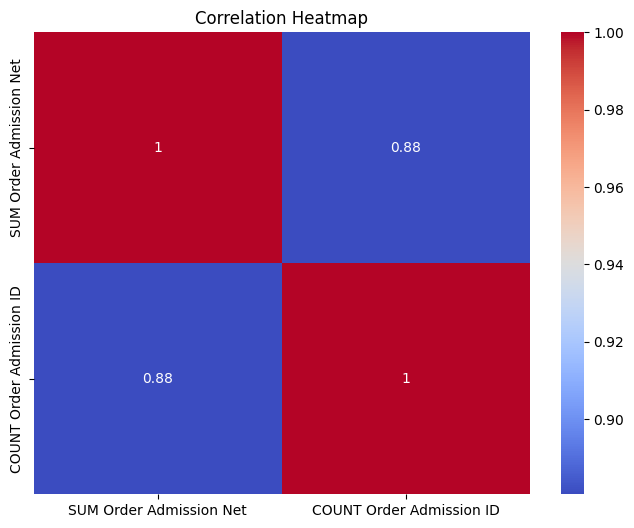

In [23]:
# Correlation matrix
plt.figure(figsize=(8, 6))
numeric_cols = df2[['SUM Order Admission Net', 'COUNT Order Admission ID']]
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


**7. Line Plot: Sales Trends Over Time**

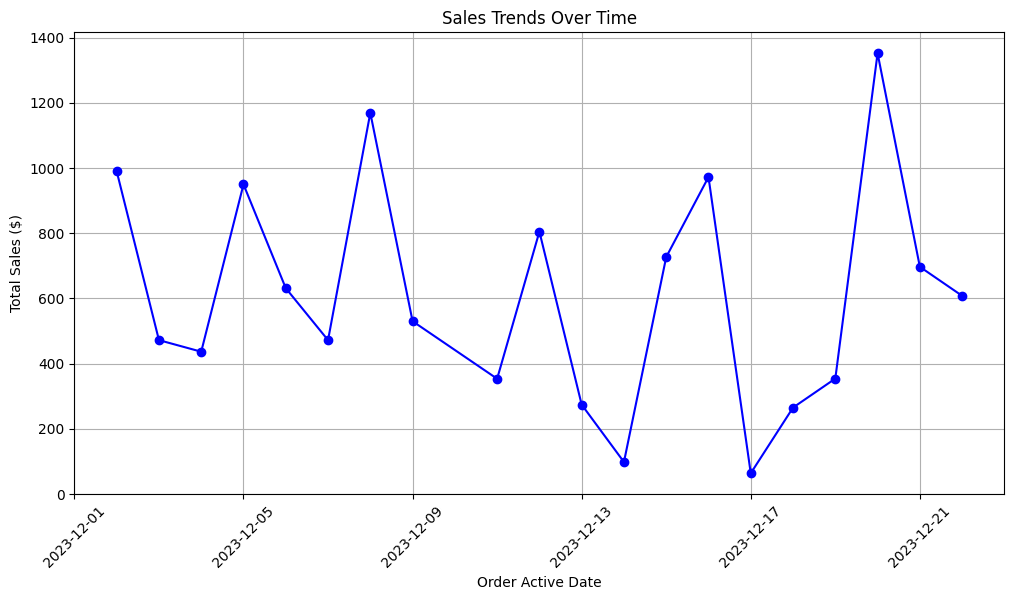

In [24]:
# Convert 'Order Active Date' to datetime format
df2['Order Active Date'] = pd.to_datetime(df2['Order Active Date'])

# Group by date and sum the admission net
sales_trend = df2.groupby(df2['Order Active Date'].dt.date)['SUM Order Admission Net'].sum()

plt.figure(figsize=(12, 6))
sales_trend.plot(kind='line', marker='o', linestyle='-', color='blue')
plt.title("Sales Trends Over Time")
plt.xlabel("Order Active Date")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**8. Box Plot: Admission Net by Price Type**

<ipython-input-25-f60cadf8dbd9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price Type Name', y='SUM Order Admission Net', data=df2, palette='Set2')


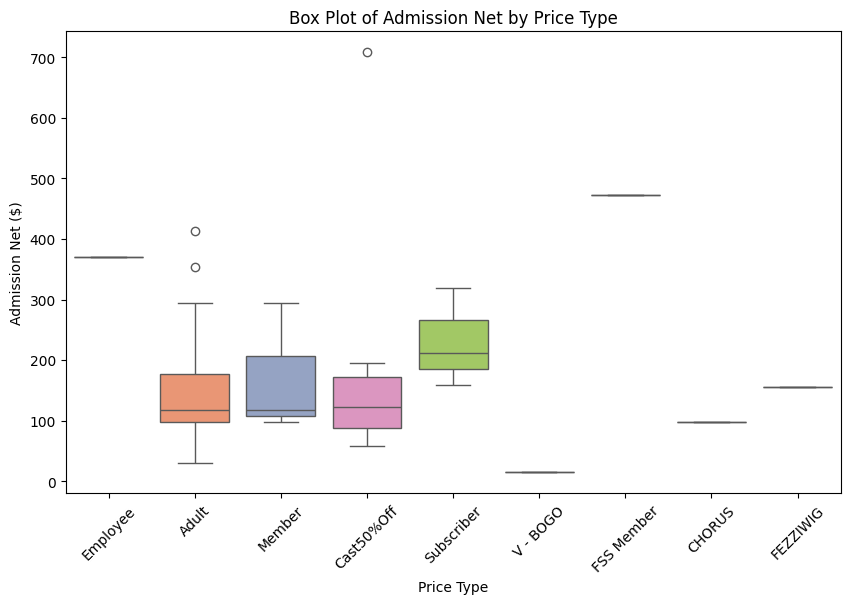

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price Type Name', y='SUM Order Admission Net', data=df2, palette='Set2')
plt.title("Box Plot of Admission Net by Price Type")
plt.xlabel("Price Type")
plt.ylabel("Admission Net ($)")
plt.xticks(rotation=45)
plt.show()


**9. Count Plot: Number of Orders by Sales Channel**

<ipython-input-26-e1b0cda5a16a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Order Created By Role', data=df2, palette='muted')


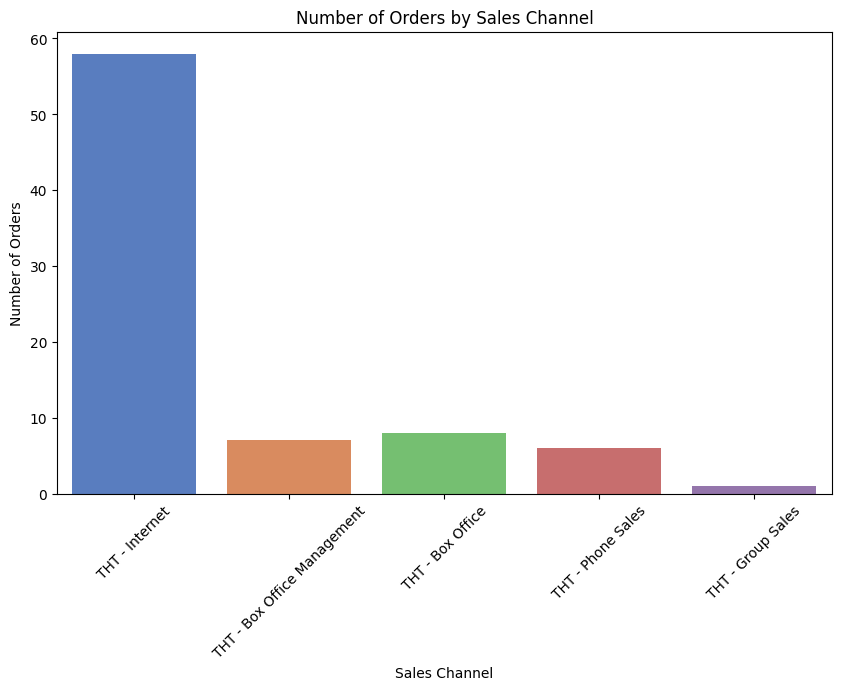

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Order Created By Role', data=df2, palette='muted')
plt.title("Number of Orders by Sales Channel")
plt.xlabel("Sales Channel")
plt.ylabel("Number of Orders")
plt.xticks(rotation=45)
plt.show()


In [27]:
from google.colab import files
uploaded = files.upload()

Saving 2324 A Christmas Carol Postcard Results.csv to 2324 A Christmas Carol Postcard Results.csv


In [28]:
import pandas as pd
import io
df3 = pd.read_csv(io.BytesIO(uploaded['2324 A Christmas Carol Postcard Results.csv']))
print(df3)

    Customer Number Default First Name Default Last Name  \
0            276844                Jim         Gulinello   
1            347127            Bethany            Ingram   
2             73306              Scott            Conner   
3             88246            Colleen            Lougee   
4            170593          Stephanie         Pandiscio   
..              ...                ...               ...   
75           191799             Pamela           Perkins   
76           274087            Michael         Tachibana   
77           114011              Scott          Williams   
78             6602              Wendy     Luopa-Macleod   
79           299137            Vanessa           De Leon   

   Default Salutation Name Default Address City Default Address State  \
0            Jim Gulinello             Millbury                    MA   
1        Dr Bethany Ingram        West Boylston                    MA   
2             Scott Conner            Jefferson             

**1. Bar Chart: Ticket Sales by Performance Code**

<ipython-input-29-d8986f7f62c1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=performance_counts.index, y=performance_counts.values, palette='viridis')


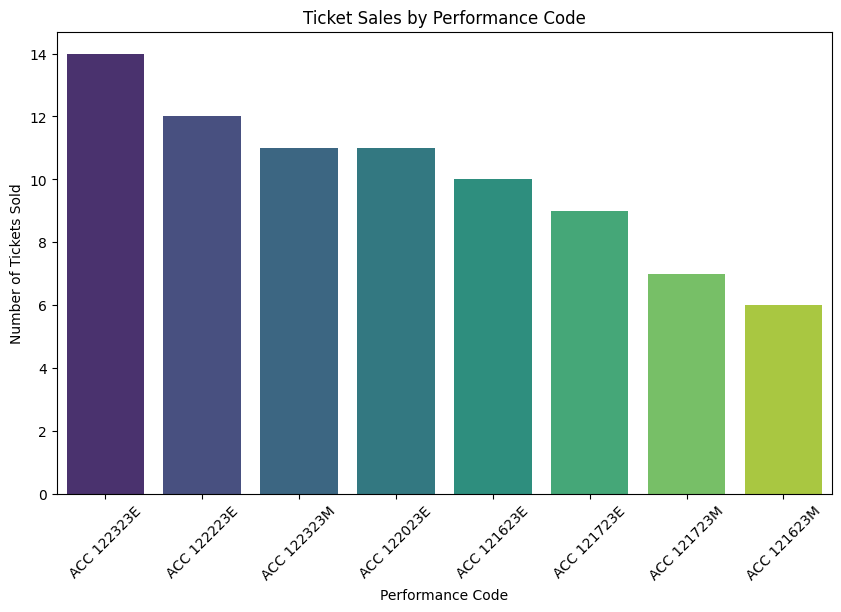

In [29]:
# Count tickets sold per performance code
performance_counts = df3['Performance Code'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=performance_counts.index, y=performance_counts.values, palette='viridis')
plt.title("Ticket Sales by Performance Code")
plt.xlabel("Performance Code")
plt.ylabel("Number of Tickets Sold")
plt.xticks(rotation=45)
plt.show()


**2. Pie Chart: Distribution of Ticket Price Types**

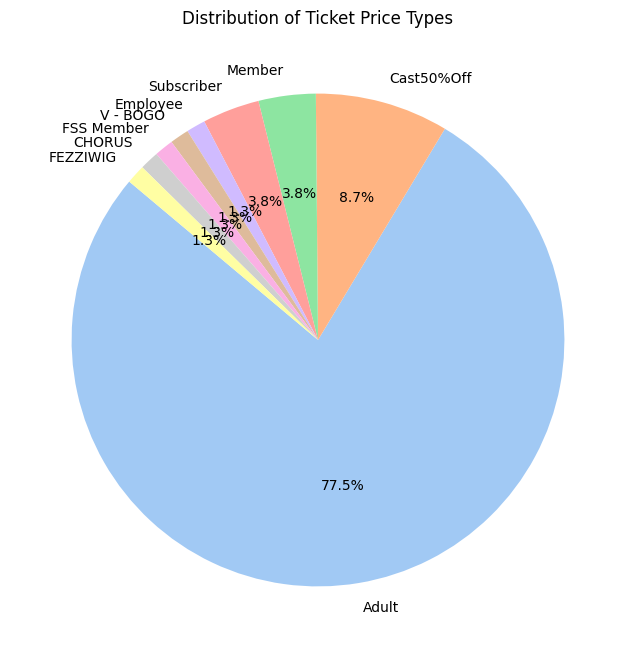

In [30]:
# Distribution of ticket price types
price_type_counts = df3['Price Type Name'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(price_type_counts, labels=price_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Distribution of Ticket Price Types")
plt.show()


**3. Bar Plot: Total Sales by Price Type**

<ipython-input-31-40a7ab41d771>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_price_type.index, y=sales_by_price_type.values, palette='coolwarm')


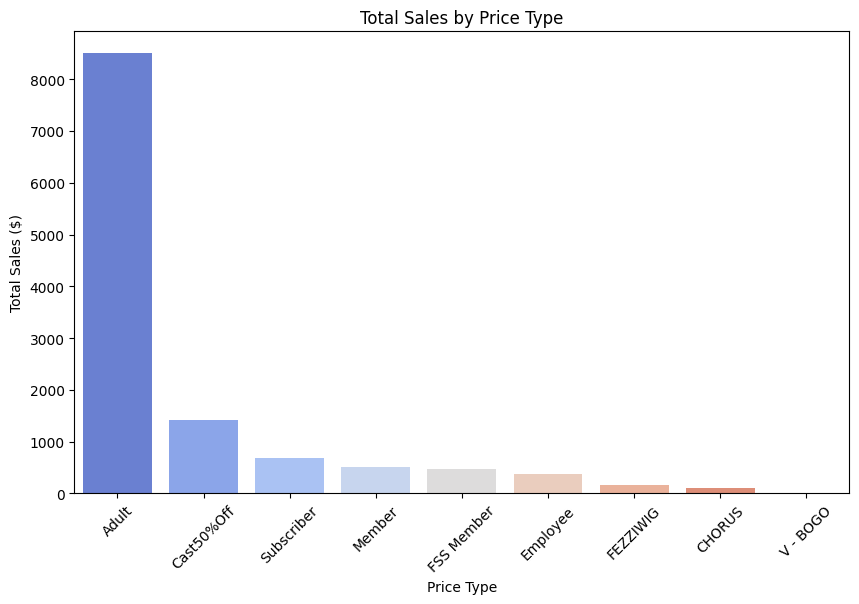

In [31]:
# Group by Price Type and sum the admission net
sales_by_price_type = df3.groupby('Price Type Name')['SUM Order Admission Net'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_price_type.index, y=sales_by_price_type.values, palette='coolwarm')
plt.title("Total Sales by Price Type")
plt.xlabel("Price Type")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.show()


In [33]:
from google.colab import files
uploaded = files.upload()

Saving 2324 A Christmas Carol Postcard Results by Price Type.csv to 2324 A Christmas Carol Postcard Results by Price Type.csv


In [34]:
import pandas as pd
import io
df4 = pd.read_csv(io.BytesIO(uploaded['2324 A Christmas Carol Postcard Results by Price Type.csv']))
print(df4)

    Customer Number Default First Name Default Last Name  \
0            276844                Jim         Gulinello   
1            347127            Bethany            Ingram   
2             73306              Scott            Conner   
3             88246            Colleen            Lougee   
4            170593          Stephanie         Pandiscio   
..              ...                ...               ...   
75           191799             Pamela           Perkins   
76           274087            Michael         Tachibana   
77           114011              Scott          Williams   
78             6602              Wendy     Luopa-Macleod   
79           299137            Vanessa           De Leon   

   Default Salutation Name Default Address City Default Address State  \
0            Jim Gulinello             Millbury                    MA   
1        Dr Bethany Ingram        West Boylston                    MA   
2             Scott Conner            Jefferson             

In [36]:
import pandas as pd

# Check if columns are the same
print("Columns in df2:", df2.columns)
print("Columns in df3:", df3.columns)
print("Columns in df4:", df4.columns)

# Check if the dataframes are exactly the same
print("\nAre df2 and df3 identical?:", df2.equals(df3))
print("Are df2 and df4 identical?:", df2.equals(df4))
print("Are df3 and df4 identical?:", df3.equals(df4))

# Compare row counts
print("\nNumber of rows in df2:", len(df2))
print("Number of rows in df3:", len(df3))
print("Number of rows in df4:", len(df4))

# Display unique values for key identifying columns
print("\nUnique Performance Codes in df2:", df2['Performance Code'].unique())
print("Unique Performance Codes in df3:", df3['Performance Code'].unique())
print("Unique Performance Codes in df4:", df4['Performance Code'].unique())


Columns in df2: Index(['Customer Number', 'Default First Name', 'Default Last Name',
       'Default Salutation Name', 'Default Address City',
       'Default Address State', 'Default Address Postal/Zip Code',
       'Order Active Date', 'Order Number', 'Performance Series Name',
       'Performance Code', 'Price Type Name', 'SUM Order Admission Net',
       'COUNT Order Admission ID', 'Order Created By Role'],
      dtype='object')
Columns in df3: Index(['Customer Number', 'Default First Name', 'Default Last Name',
       'Default Salutation Name', 'Default Address City',
       'Default Address State', 'Default Address Postal/Zip Code',
       'Order Active Date', 'Order Number', 'Performance Series Name',
       'Performance Code', 'Price Type Name', 'SUM Order Admission Net',
       'COUNT Order Admission ID', 'Order Created By Role'],
      dtype='object')
Columns in df4: Index(['Customer Number', 'Default First Name', 'Default Last Name',
       'Default Salutation Name', 'Defaul